# Restaurant Revenue Prediction

This task is to predict the annual restaurant revenue of a particular location 
given a set of datapoints associated with that location. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # For easier statistical plotting
sns.set_style("whitegrid")

In [2]:
import warnings
warnings. filterwarnings('ignore')

## Data Extraction

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#checking the shape of the data
print("Train :",train.shape)
print("Test:",test.shape)

Train : (137, 43)
Test: (100000, 42)


In [5]:
train.head(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319.0
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,...,3.0,4,5,2,2,3,5,4,4,5166635.0
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,...,2.0,0,0,0,0,0,0,0,0,4491607.0
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,...,3.0,4,5,5,3,4,5,4,5,4952497.0
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,...,2.5,0,0,0,0,0,0,0,0,5444227.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

## Target Engineering

<AxesSubplot:xlabel='revenue'>

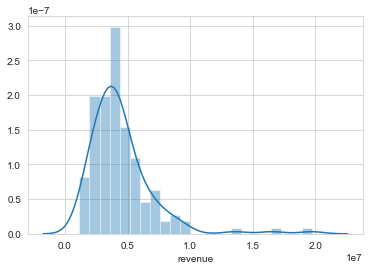

In [7]:
# Check distribution of the revenue
sns.distplot(train['revenue'])

In [8]:
# detecting outliers
train[train['revenue']  > 10000000 ]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,...,2.0,0,0,0,0,0,0,0,0,19696939.0
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0.0,0,0,0,0,0,0,0,0,16549064.0
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,1.0,5,5,4,2,5,5,5,3,13575224.0


In [9]:
# Drop outliers
train = train[train['revenue'] < 10000000 ]
train.reset_index(drop=True).head()
train.shape

(134, 43)

<AxesSubplot:xlabel='revenue'>

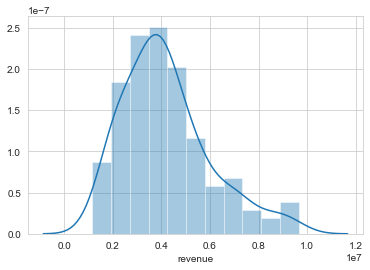

In [10]:
y = train['revenue']
sns.distplot(y)

## Feature Engineering

In [11]:
#function to calculate the number of days since opening data
def calc_days(dtime):
    now_time = pd.to_datetime('2015-01-01')
    result = (now_time - dtime) 
    result = result.dt.days
    return result 

In [12]:
# calculate the number of days since opening data
train['days_since_open'] = calc_days(pd.to_datetime(train['Open Date']))
test['days_since_open'] = calc_days(pd.to_datetime(test['Open Date']))

In [13]:
train['days_since_open'].describe()

count     134.000000
mean     2051.582090
std      1423.748247
min       341.000000
25%      1105.500000
50%      1762.500000
75%      2505.500000
max      6812.000000
Name: days_since_open, dtype: float64

In [14]:
train=train.drop('Open Date', axis = 1)
test=test.drop('Open Date', axis = 1)

In [15]:
# get column with null values in train data 
train.columns[train.isna().any()].tolist()

[]

In [16]:
# get column with null values in test data 
test.columns[test.isna().any()].tolist()

[]

In [17]:
# detecting numeric features and categorical features
numeric_feats = train.dtypes[train.dtypes != 'object'].index
categorical_feats = train.dtypes[train.dtypes == 'object'].index

In [18]:
# list of numeric features
numeric_feats

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue',
       'days_since_open'],
      dtype='object')

In [19]:
# list of categorical features
categorical_feats

Index(['City', 'City Group', 'Type'], dtype='object')

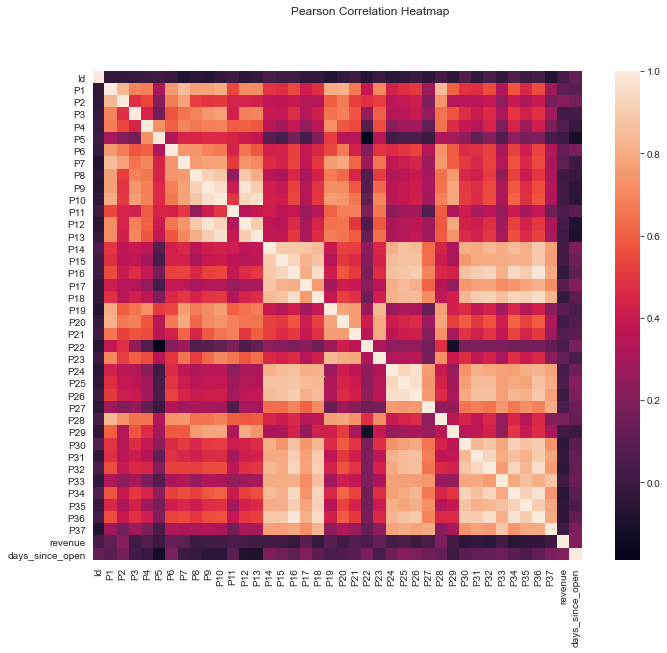

In [20]:
# check Pearson Correlation between the numeric variables
cormat = train[numeric_feats].corr()

plt.figure(figsize=(12,9))
sns.heatmap(cormat, square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

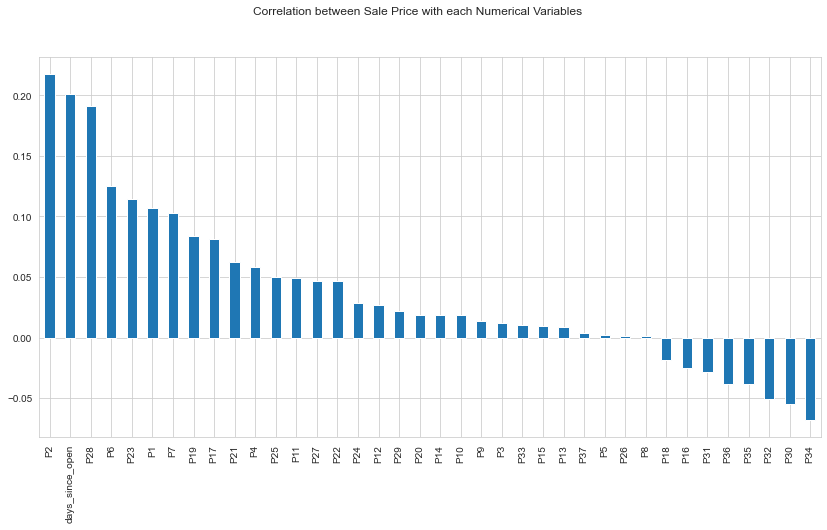

In [21]:
corr_to_revenue = train.drop(["Id"], axis=1).corr()["revenue"].sort_values(ascending=False)
plt.figure(figsize=(14,7))
corr_to_revenue .drop("revenue").plot.bar()
plt.suptitle("Correlation between Sale Price with each Numerical Variables")
plt.show()


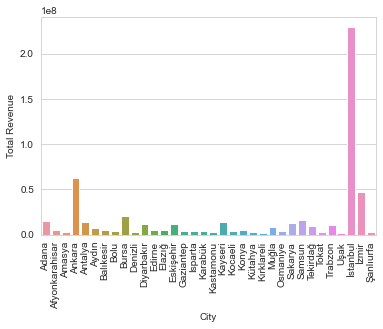

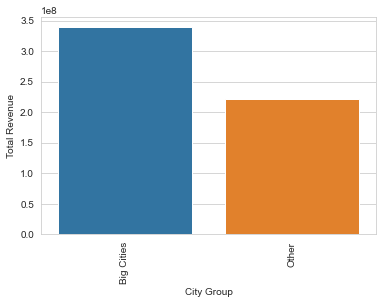

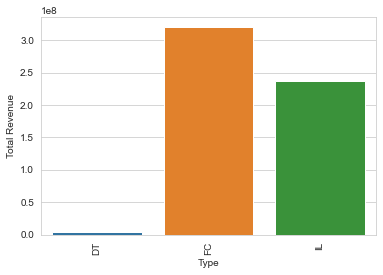

In [22]:
# Analyzing Categorical Variables
for variable in categorical_feats:
    df_cat = train[[variable,'revenue']].groupby(variable).revenue.sum().reset_index()
    df_cat.columns = [variable,'Total Revenue']
    plt.xticks(rotation=90)
    sns.barplot(x=variable, y='Total Revenue', data=df_cat)
    plt.show()


In [23]:
x= train.drop(["Id","revenue"], axis = 1)
x_test = test.drop("Id", axis = 1)
x.shape, x_test.shape

((134, 41), (100000, 41))

In [24]:
data = pd.concat([x, x_test], sort=False)
data.shape

(100134, 41)

In [25]:
# converting the categorical features by using dummy table
City_Group_dummy =  pd.get_dummies(data['City Group'], prefix="CG")

Type_dummy =  pd.get_dummies(data['Type'], prefix="T")


data = pd.concat([data, City_Group_dummy,Type_dummy ], axis=1)


data=data.drop(["City Group","Type"], axis = 1)
print(data.shape)



(100134, 45)


In [26]:
# converting the City feature by using LabelEncoder 
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
data.City=le.fit_transform(data.City)

In [27]:
data.dtypes

City                 int64
P1                   int64
P2                 float64
P3                 float64
P4                 float64
P5                   int64
P6                   int64
P7                   int64
P8                   int64
P9                   int64
P10                  int64
P11                  int64
P12                  int64
P13                float64
P14                  int64
P15                  int64
P16                  int64
P17                  int64
P18                  int64
P19                  int64
P20                  int64
P21                  int64
P22                  int64
P23                  int64
P24                  int64
P25                  int64
P26                float64
P27                float64
P28                float64
P29                float64
P30                  int64
P31                  int64
P32                  int64
P33                  int64
P34                  int64
P35                  int64
P36                  int64
P

In [28]:
num_train = train.shape[0]
num_test = test.shape[0]
print(num_train, num_test)


134 100000


In [29]:
X =data[0:num_train]
X_test = data[num_train:]
print(X.shape)
print(X_test.shape)

(134, 45)
(100000, 45)


## Modelling

In [30]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRFRegressor,XGBRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor

In [31]:
# spliting the training data into training and validation data
from sklearn.model_selection import train_test_split,KFold,cross_val_score
x_train,x_val,y_train,y_val=train_test_split(X,y)

### Model 1: XGBoost

In [32]:
model=XGBRegressor(n_estimators=1000)
model.fit(X,y)
kfold=KFold(n_splits=10)
res=cross_val_score(model,X,y,cv=kfold)
res.mean()*100

-42.73072456640601

In [33]:
yp=model.predict(x_val)

In [34]:
# Calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(r2_score(y_val,yp))
print(mean_absolute_error(y_val,yp))
print(mean_squared_error(y_val,yp))

0.9999999999996975
0.5036764705882353
0.5142463235294118


In [35]:
# Predict revenue for test data
y_pred1=model.predict(X_test)

In [36]:
y_pred1[0:10]

array([3526933.5, 3151357.8, 1706369.6, 3181746.8, 3449749.2, 4142258.2,
       2915558.5, 1857002.5, 4222836. , 4159575.8], dtype=float32)

In [37]:
#Creating csv file for kaggle submission
df_submission = pd.DataFrame({ "Id":  test["Id"].values, "Prediction": y_pred1 })

df_submission.to_csv("submission_1.csv", index= False)

### Model 2: Random Forest¶

In [38]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor()
rf.fit(X.astype(int), y.astype(int))
kfold=KFold(n_splits=10)
res=cross_val_score(rf,X,y,cv=kfold)
res.mean()*100

-16.478966314576954

In [39]:
yp2=rf.predict(x_val)

In [40]:
# Calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(r2_score(y_val,yp2))
print(mean_absolute_error(y_val,yp2))
print(mean_squared_error(y_val,yp2))

0.8837181691236262
344803.0152941176
197663132128.4256


In [41]:
# Predict revenue for test data
y_pred2=rf.predict(X_test)

In [42]:
y_pred2[0:10]

array([4032311.77, 3204307.14, 3758113.79, 3472925.35, 3765049.97,
       4215770.4 , 3837179.41, 3636556.88, 4906459.56, 4215397.38])

In [43]:
#Creating csv file for kaggle submission
df_submission = pd.DataFrame({ "Id": test["Id"].values, "Prediction": y_pred2 })

df_submission.to_csv("submission_2.csv", index= False)